<a href="https://colab.research.google.com/github/HRahman1777/Predicting_The_Chance_of_Major_Diseases_using_ML-colab/blob/main/Predicting_the_chance_of_diseases_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive and Read Dataset and Import library 

In [132]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [133]:
import pandas as pd

In [134]:
train = pd.read_csv('gdrive/My Drive/Colab Notebooks/patient_data.csv')

Library For Data Visual 

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [136]:
import numpy as np

# Show Dataset

In [137]:
train.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


# Show Shape

In [138]:
train.shape

(100000, 8)

# Show All Information with missing Value

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gender           100000 non-null  object 
 1   age              100000 non-null  float64
 2   diabetes         100000 non-null  int64  
 3   hypertension     100000 non-null  int64  
 4   stroke           100000 non-null  int64  
 5   heart disease    100000 non-null  int64  
 6   smoking history  64184 non-null   object 
 7   BMI              74556 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.1+ MB


# Show Null Value

In [140]:
train.isnull().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35816
BMI                25444
dtype: int64

# Data Clean - removing missing data

In [141]:
new_data = train.dropna(axis = 0, how ='any')

In [142]:
new_data.shape

(52175, 8)

In [143]:
new_data.isnull().sum()

gender             0
age                0
diabetes           0
hypertension       0
stroke             0
heart disease      0
smoking history    0
BMI                0
dtype: int64

# Data Clean - combining diseases row

In [144]:
temp_data = new_data

In [145]:
temp_data["disease"] = temp_data["diabetes"]+ temp_data["stroke"]+temp_data["heart disease"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
temp_data.head(10)

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,disease
0,Female,80.0,0,0,0,1,never,25.19,1
3,Female,36.0,0,0,0,0,current,23.45,0
4,Male,76.0,0,1,0,1,current,20.14,1
6,Female,44.0,1,0,0,0,never,19.31,1
8,Male,42.0,0,0,0,0,never,33.64,0
11,Female,54.0,0,0,0,0,former,54.70,0
12,Female,78.0,0,0,0,0,former,36.05,0
13,Female,67.0,0,0,0,0,never,25.69,0
16,Male,15.0,0,0,0,0,never,30.36,0
17,Female,42.0,0,0,0,0,never,24.48,0


# Visual Data - bar chart

In [147]:
def bar_chart(feature):
    diseased = temp_data[temp_data['disease']==1][feature].value_counts()
    not_diseased = temp_data[temp_data['disease']==0][feature].value_counts()
    df = pd.DataFrame([diseased,not_diseased])
    df.index = ['diseased','not_diseased']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

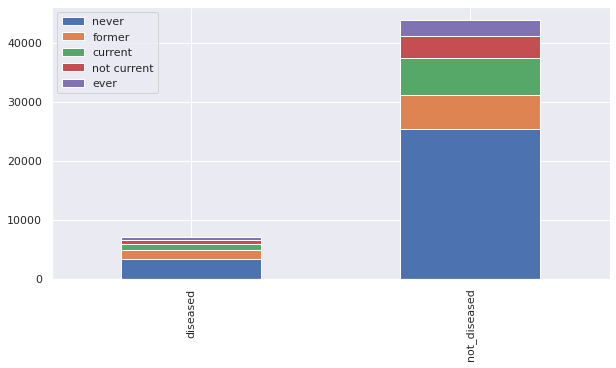

In [148]:
bar_chart('smoking history')

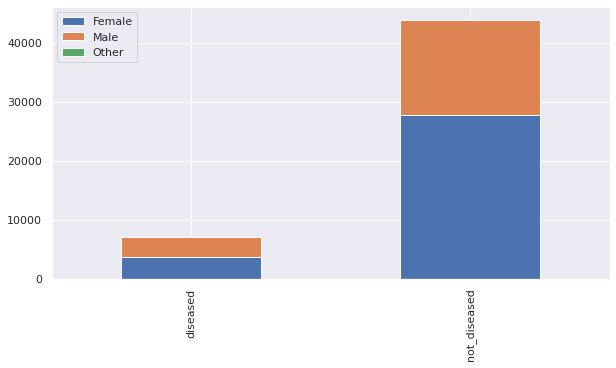

In [149]:
bar_chart('gender')

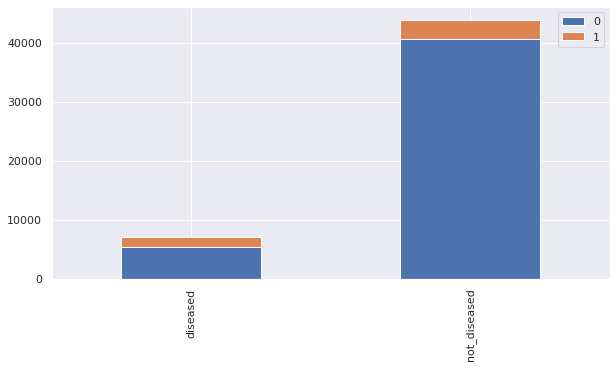

In [150]:
bar_chart('hypertension')

# Mapping For Gender

In [151]:
maped_data = [temp_data]

gender_mapping = {"Male": 0, "Female": 1, "Other": 2}
for dataset in maped_data:
    dataset['new_gender'] = dataset['gender'].map(gender_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [152]:
temp_data.head()


,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,disease,new_gender
0,Female,80.0,0,0,0,1,never,25.19,1,1
3,Female,36.0,0,0,0,0,current,23.45,0,1
4,Male,76.0,0,1,0,1,current,20.14,1,0
6,Female,44.0,1,0,0,0,never,19.31,1,1
8,Male,42.0,0,0,0,0,never,33.64,0,0


# Mapping For Smoke History 

In [153]:
s_history_mapping = {"never": 0, "former": 1,"current": 1, "not current": 1, "ever": 1}
for dataset in maped_data:
    dataset['smoking_history'] = dataset['smoking history'].map(s_history_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
temp_data.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,disease,new_gender,smoking_history
0,Female,80.0,0,0,0,1,never,25.19,1,1,0
3,Female,36.0,0,0,0,0,current,23.45,0,1,1
4,Male,76.0,0,1,0,1,current,20.14,1,0,1
6,Female,44.0,1,0,0,0,never,19.31,1,1,0
8,Male,42.0,0,0,0,0,never,33.64,0,0,0


# Drop Unnecessary Column (gender, diabetes, stroke, heart disease, smoking history)

In [155]:
temp_data.drop('gender', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [156]:
temp_data.drop('diabetes', axis=1, inplace=True)
temp_data.drop('stroke', axis=1, inplace=True)
temp_data.drop('heart disease', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [157]:
temp_data.drop('smoking history', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [158]:
temp_data.head()

,age,hypertension,BMI,disease,new_gender,smoking_history
0,80.0,0,25.19,1,1,0
3,36.0,0,23.45,0,1,1
4,76.0,1,20.14,1,0,1
6,44.0,0,19.31,1,1,0
8,42.0,0,33.64,0,0,0


# Age Dividing

Setting up combined value of disease column

In [159]:
disease_mapping = {0: 0, 1: 1, 2: 1, 3: 1}
for dataset in maped_data:
    dataset['disease'] = dataset['disease'].map(disease_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


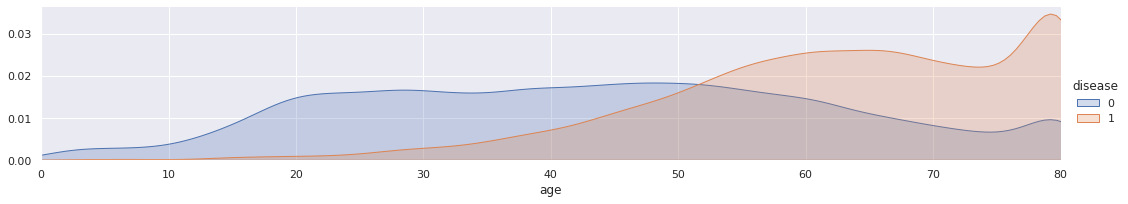

In [160]:
facet = sns.FacetGrid(temp_data, hue='disease',aspect=5)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, temp_data['age'].max()))
facet.add_legend()
plt.show()

(0.0, 30.0)

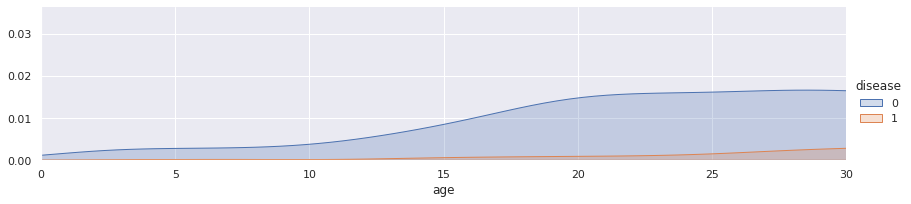

In [161]:
facet = sns.FacetGrid(temp_data, hue="disease",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, temp_data['age'].max()))
facet.add_legend()
plt.xlim(0, 30)

(30.0, 50.0)

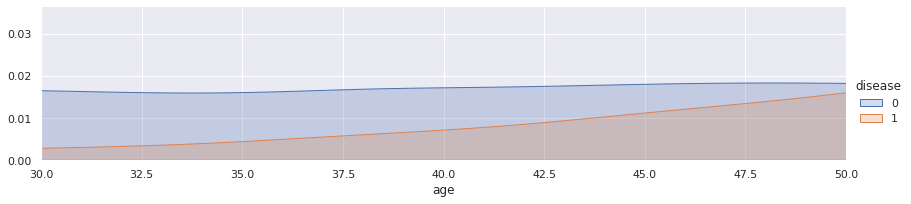

In [162]:
facet = sns.FacetGrid(temp_data, hue="disease",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, temp_data['age'].max()))
facet.add_legend()
plt.xlim(30, 50)

(50.0, 90.0)

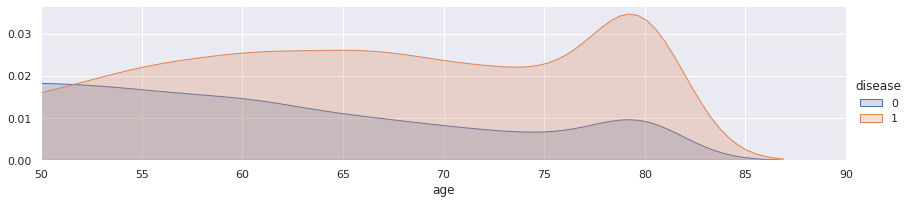

In [163]:
facet = sns.FacetGrid(temp_data, hue="disease",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, temp_data['age'].max()))
facet.add_legend()
plt.xlim(50, 90)

**Dividing age**

0 for 0-30

1 for 31-50

2 for 51-65

3 for 66-85

4 for 86-rest

In [164]:
"""
for dataset in temp_data:
    dataset.loc[(dataset['age'] <= 30), 'age'] = 0
    dataset.loc[(dataset['age'] > 30) & (dataset['age'] <= 50), 'age'] = 1
    dataset.loc[(dataset['age'] > 50) & (dataset['age'] <= 65), 'age'] = 2
    dataset.loc[(dataset['age'] > 65) & (dataset['age'] <= 80), 'age'] = 3
    dataset.loc[ dataset['age'] > 80, 'age'] = 4
"""

"\nfor dataset in temp_data:\n    dataset.loc[(dataset['age'] <= 30), 'age'] = 0\n    dataset.loc[(dataset['age'] > 30) & (dataset['age'] <= 50), 'age'] = 1\n    dataset.loc[(dataset['age'] > 50) & (dataset['age'] <= 65), 'age'] = 2\n    dataset.loc[(dataset['age'] > 65) & (dataset['age'] <= 80), 'age'] = 3\n    dataset.loc[ dataset['age'] > 80, 'age'] = 4\n"

In [165]:
r = [0,30,50,65, 85, 100]
g = [0, 1, 2, 3, 4]
temp_data['age'] = pd.cut(temp_data['age'], bins = r, labels = g)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


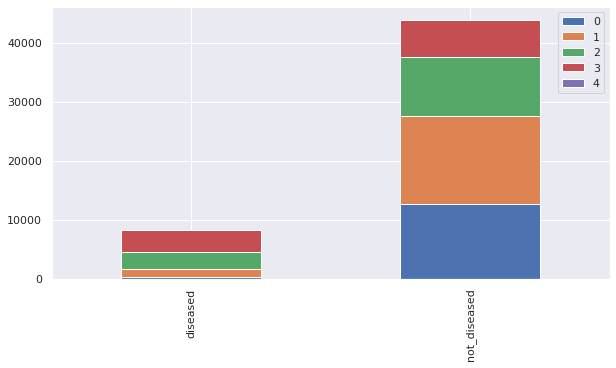

In [166]:
bar_chart('age')

# Dividing BMI

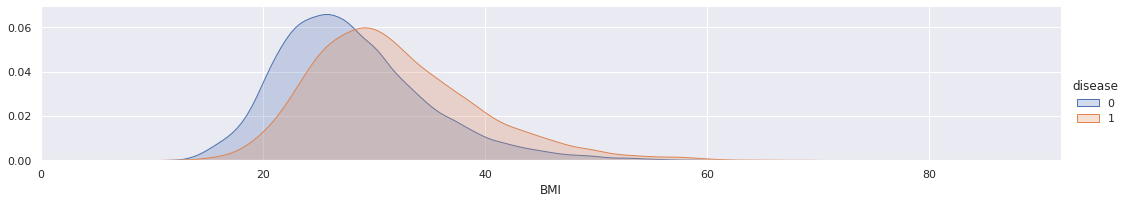

In [167]:
facet = sns.FacetGrid(temp_data, hue="disease",aspect=5)
facet.map(sns.kdeplot,'BMI',shade= True)
facet.set(xlim=(0, temp_data['BMI'].max()))
facet.add_legend()
plt.show()
#plt.xlim(0, 30)

(0.0, 20.0)

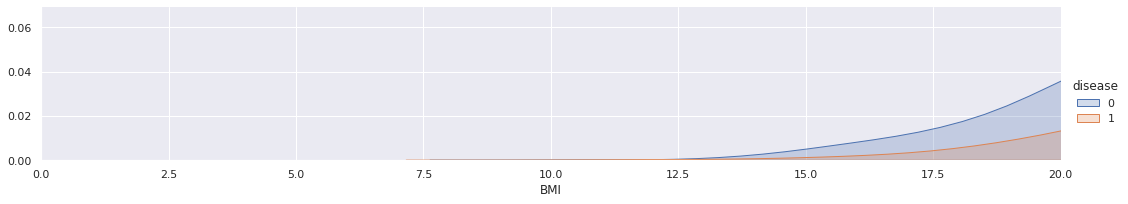

In [168]:
facet = sns.FacetGrid(temp_data, hue="disease",aspect=5)
facet.map(sns.kdeplot,'BMI',shade= True)
facet.set(xlim=(0, temp_data['BMI'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 25.0)

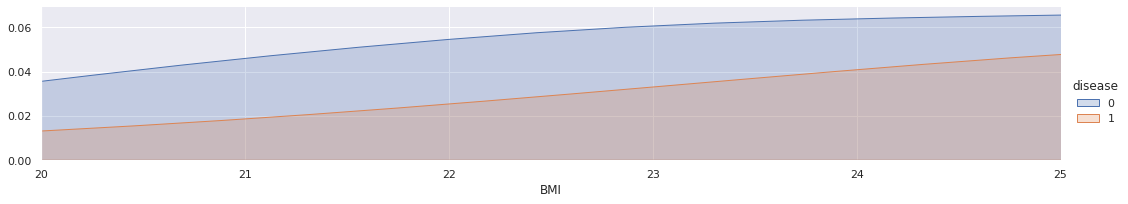

In [169]:
facet = sns.FacetGrid(temp_data, hue="disease",aspect=5)
facet.map(sns.kdeplot,'BMI',shade= True)
facet.set(xlim=(0, temp_data['BMI'].max()))
facet.add_legend()
plt.xlim(20, 25)

(25.0, 35.0)

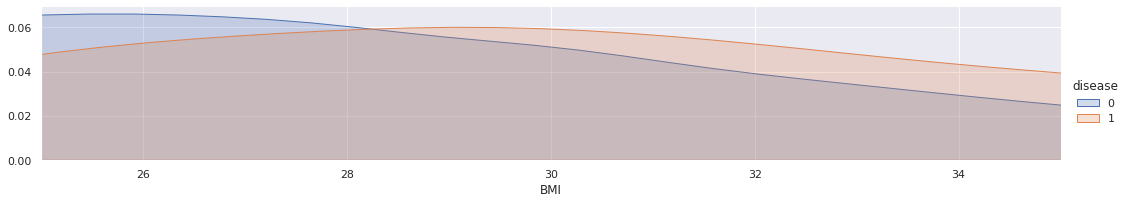

In [170]:
facet = sns.FacetGrid(temp_data, hue="disease",aspect=5)
facet.map(sns.kdeplot,'BMI',shade= True)
facet.set(xlim=(0, temp_data['BMI'].max()))
facet.add_legend()
plt.xlim(25, 35)

(35.0, 50.0)

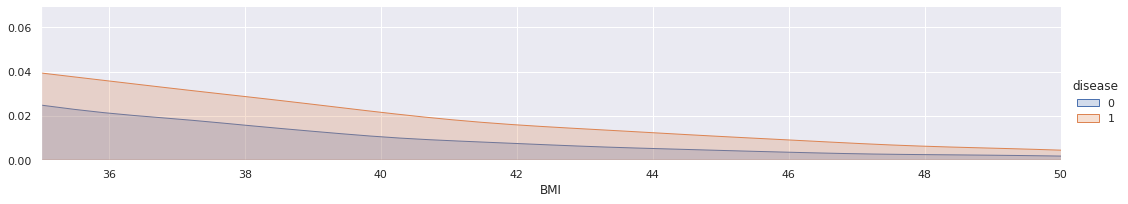

In [171]:
facet = sns.FacetGrid(temp_data, hue="disease",aspect=5)
facet.map(sns.kdeplot,'BMI',shade= True)
facet.set(xlim=(0, temp_data['BMI'].max()))
facet.add_legend()
plt.xlim(35, 50)

0 for 0-15

1 for 15-25

2 for 25-35

3 for 35-50

In [172]:
r = [0,15,25,35,50]
g = [0, 1, 2, 3]
temp_data['BMI'] = pd.cut(temp_data['BMI'], bins = r, labels = g)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


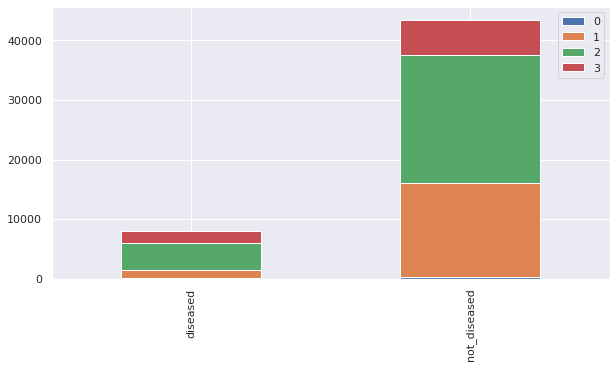

In [173]:
bar_chart('BMI')

# Dividing dataset

In [174]:
train_data = temp_data.drop('disease', axis=1)     
target = temp_data['disease']

train_data.shape, target.shape

((52175, 5), (52175,))

# Splitting the dataset into train and test data

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.20, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print("\ny_test data\n",y_test)

print("\ny_test data's value count\n", y_test.value_counts())

X_train:  (41740, 5)
X_test:  (10435, 5)
y_train:  (41740,)
y_test:  (10435,)

y_test data
 38128    0
20450    0
13205    0
92323    0
75956    0
        ..
5883     0
54380    0
83733    0
20465    0
7769     1
Name: disease, Length: 10435, dtype: int64

y_test data's value count
 0    8748
1    1687
Name: disease, dtype: int64



# Train the dataset using DecisionTreeClassifier and RandomForestClassifier

# DecisionTreeClassifier

In [176]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

Performance evaluation

In [177]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[8596  152]
 [1470  217]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8748
           1       0.59      0.13      0.21      1687

    accuracy                           0.84     10435
   macro avg       0.72      0.56      0.56     10435
weighted avg       0.81      0.84      0.80     10435



Calculating accuracy

In [178]:
from sklearn.metrics import accuracy_score
score_dt = accuracy_score(y_test, y_pred)
print(score_dt)

0.8445615716339243


# RandomForestClassifier

In [179]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Performance evaluation

In [180]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[8610  138]
 [1496  191]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8748
           1       0.58      0.11      0.19      1687

    accuracy                           0.84     10435
   macro avg       0.72      0.55      0.55     10435
weighted avg       0.81      0.84      0.80     10435



Calculating accuracy

In [181]:
from sklearn.metrics import accuracy_score
score_rf = accuracy_score(y_test, y_pred)
print(score_rf)

0.8434115955917585


# KNeighborsClassifier

In [182]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

In [183]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[7668 1080]
 [1038  649]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      8748
           1       0.38      0.38      0.38      1687

    accuracy                           0.80     10435
   macro avg       0.63      0.63      0.63     10435
weighted avg       0.80      0.80      0.80     10435



In [184]:
from sklearn.metrics import accuracy_score
score_kn = accuracy_score(y_test, y_pred)
print(score_kn)

0.7970292285577384


# LogisticRegression

In [185]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [186]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[ 109 8639]
 [  46 1641]]
              precision    recall  f1-score   support

           0       0.70      0.01      0.02      8748
           1       0.16      0.97      0.27      1687

    accuracy                           0.17     10435
   macro avg       0.43      0.49      0.15     10435
weighted avg       0.62      0.17      0.06     10435



In [187]:
from sklearn.metrics import accuracy_score
score_lr = accuracy_score(y_test, y_pred)
print(score_lr)

0.16770483948251078


# Conclusion 

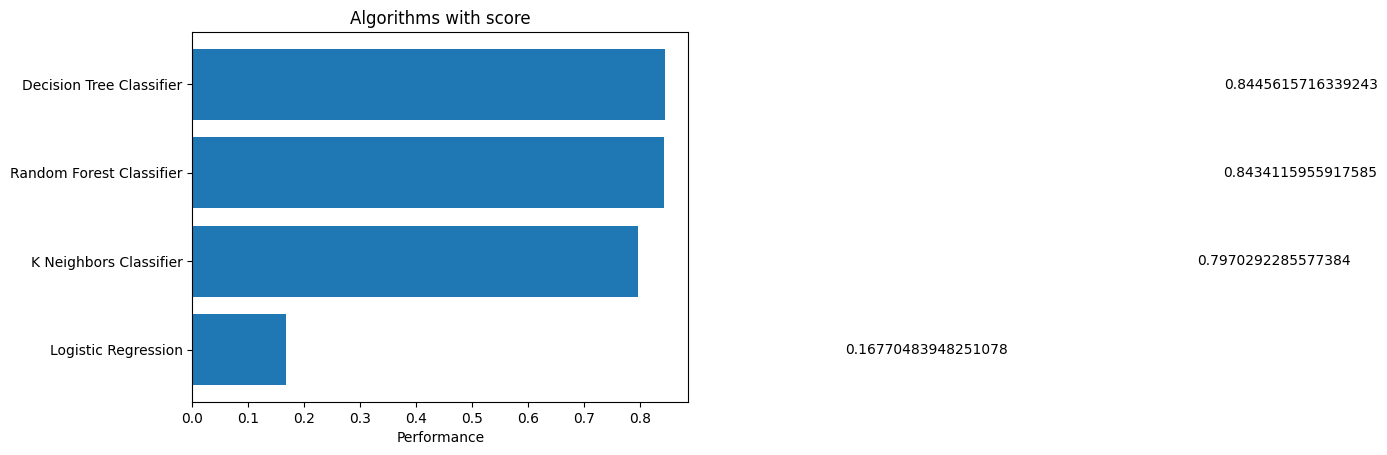

In [188]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Decision Tree Classifier', 'Random Forest Classifier', 'K Neighbors Classifier', 'Logistic Regression')
y_pos = np.arange(len(algorithms))
x = (score_dt, score_rf, score_kn, score_lr)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Algorithms with score')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()